# Importación modulos y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize


matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory=False) 

# Exploración y limpieza de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lote       1688 non-null   int64  
 1   Individuo  1688 non-null   int64  
 2   AE         1688 non-null   float64
 3   LE         1688 non-null   float64
 4   AT         1688 non-null   float64
 5   LT         1688 non-null   float64
 6   AA         1688 non-null   float64
 7   LA         1688 non-null   float64
 8   NV         1688 non-null   float64
 9   Morfotipo  1688 non-null   object 
 10  Labio      1688 non-null   int64  
 11  cox1-lsu   105 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 158.4+ KB


In [4]:
data["cox1-lsu"] = data["cox1-lsu"].replace(np.nan,"0")

In [ ]:
data.iloc[:,2:].describe()

In [ ]:
print(pd.value_counts(data["Morfotipo"], sort = True, normalize=True))

In [ ]:
print(pd.value_counts(data["Labio"], sort = True, normalize=True))

In [ ]:
data['cox1-lsu'].value_counts()

### Creación columnas nuevas

In [5]:
#Creamos un Filtro con NV > 4.75 y presencia de labio (divide adulto de joven???)
data["Filtro_NV"] = np.where(np.logical_or(data["NV"] > 4.75, data["Labio"] == 1),True,False)

In [ ]:
print(pd.value_counts(data["Filtro_NV"], sort = True, normalize=True))

In [6]:
data["Ratio_LE_AE"] = data["LE"]/data["AE"]
data["Ratio_LT_AT"] = data["LT"]/data["AT"]
data["Ratio_LA_AA"] = data["LA"]/data["AA"]

data["Ratio_LE_LT"] = data["LE"]/data["LT"]
data["Ratio_AE_AT"] = data["AE"]/data["AT"]
data["Ratio_LA_LT"] = data["LA"]/data["LT"]
data["Ratio_AA_AT"] = data["AA"]/data["AT"]
data["Ratio_LE_LA"] = data["LE"]/data["LA"]
data["Ratio_AE_AA"] = data["AE"]/data["AA"]

#aux copy: 'Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'

In [ ]:
data.head()

### Relación entre variables

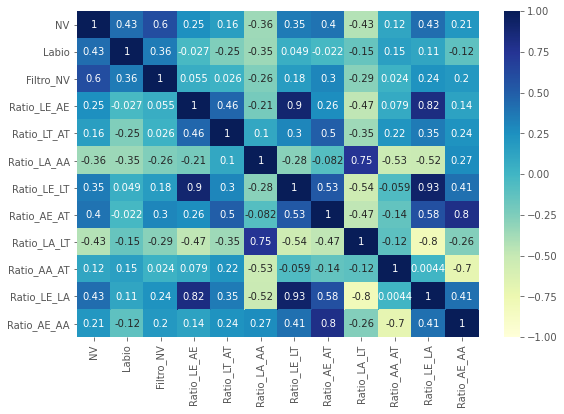

In [7]:
def _print_matriz_correlacion(dflocal):
    plt.rcParams['figure.figsize'] = (9, 6)
    plt.rcParams['font.size'] = 10
    sns.heatmap(dflocal, vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)
_print_matriz_correlacion(data.iloc[8:,8:].corr())  

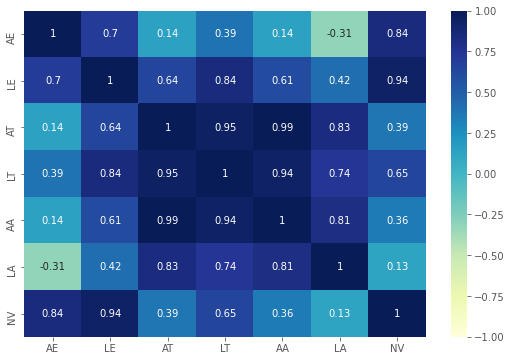

In [8]:
#variables originales del dataset
_print_matriz_correlacion(data.iloc[2:9,2:9].corr())  

In [ ]:
#todas las variables por Morfotipo
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
             hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

In [ ]:
#variables originales por Morfotipo
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

In [ ]:
#variables originales por FiltroNV
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],hue='Filtro_NV',plot_kws={'alpha': 0.5},aspect=1.5);

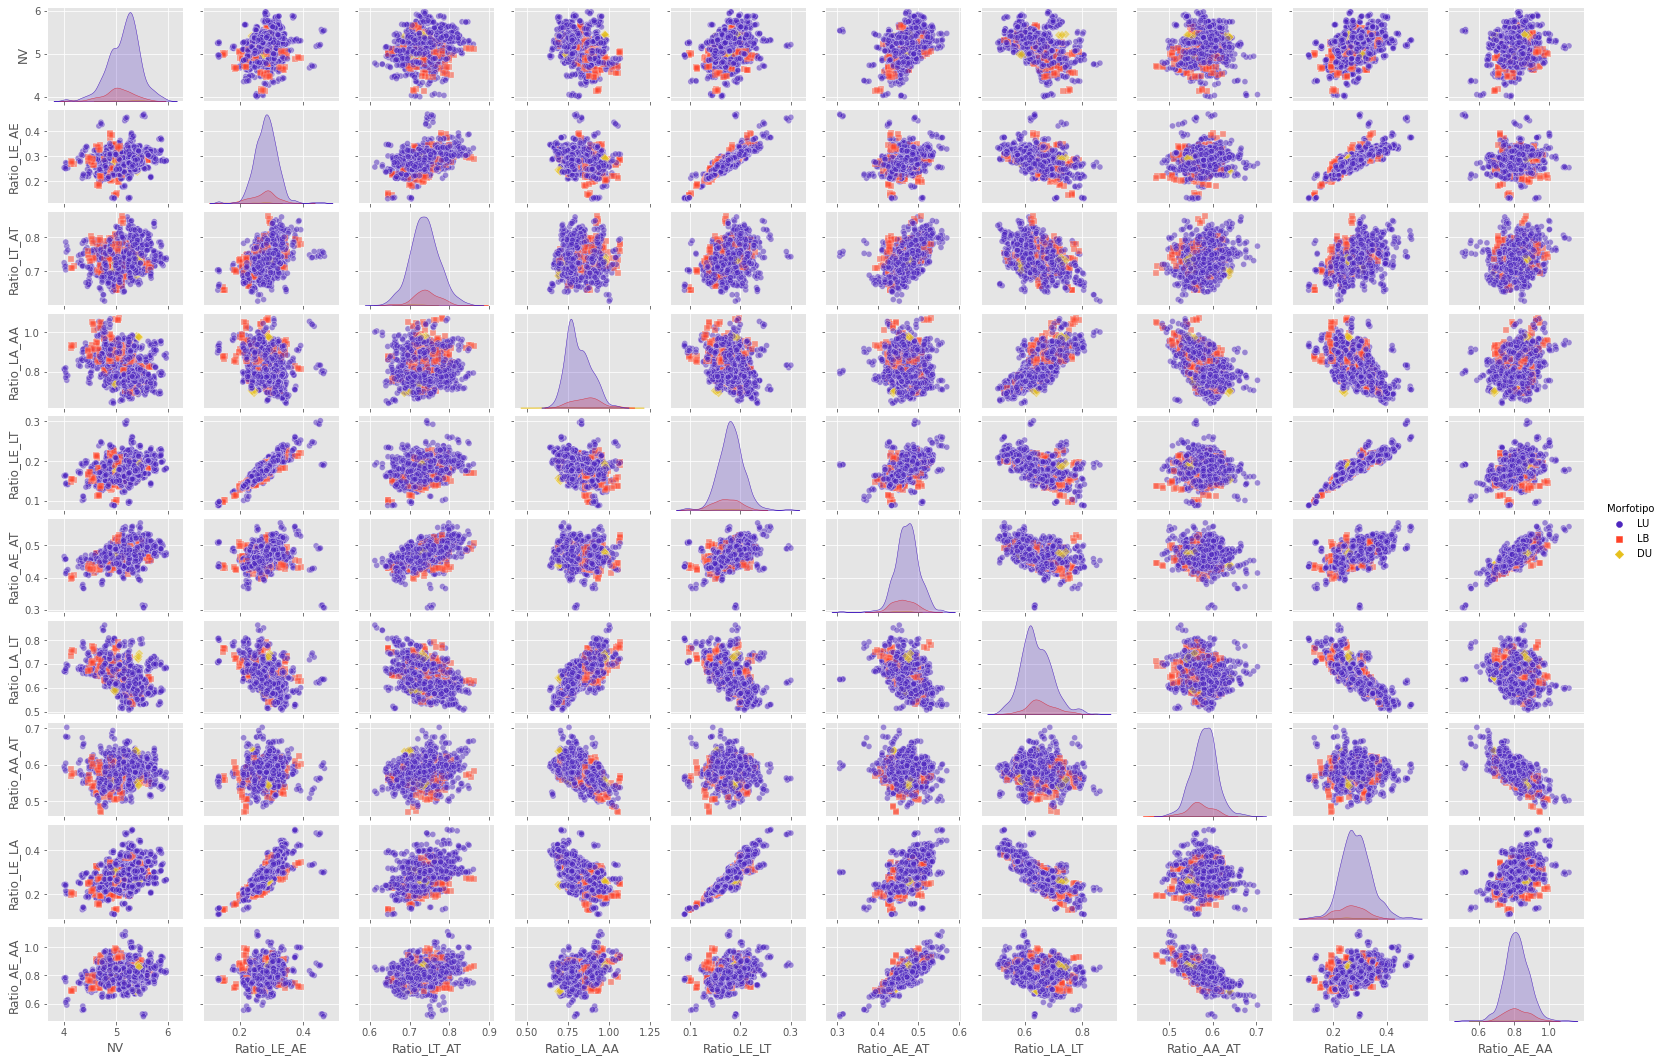

In [9]:
#Variables nuevas por Morfotipo
sns.pairplot(data=data,x_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
         y_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
             hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

### Distribución de las observaciones

In [ ]:
def distribution_plotter(data, label, bins="auto"):    
    plt.figure(figsize = (10,5))
    sns.set_style("white")    
    dist = sns.histplot(data, bins=bins, stat = "count", kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = 500)    
    dist.set_title('Distribucion ', fontsize = 16)
    plt.xticks(rotation=45, ha='right')

In [ ]:
distribution_plotter(data["Morfotipo"],data["Morfotipo"].unique())

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 9))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  
    plt.show()

In [ ]:
draw_histograms(data, data[['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']], 4, 4)

# Modelos de clustering

## Importación modulos y dataset

In [13]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabasz_score
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.cm as cm

## Prueba Kmeans

### Con las variables originales

In [32]:
x = data[['AE','LE','AT','LT','AA','LA','NV','Labio']]
y_true = data["cox1-lsu"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

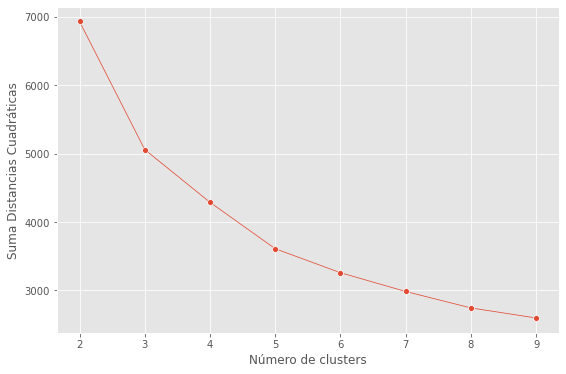

In [15]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

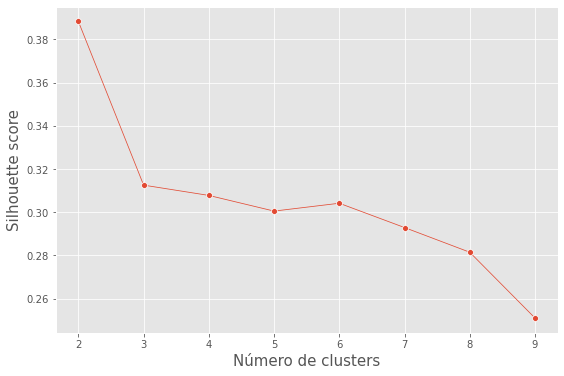

In [16]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_scaled)
    score=silhouette_score(x_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

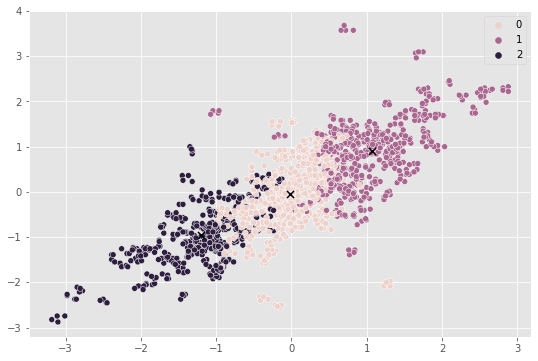

In [17]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

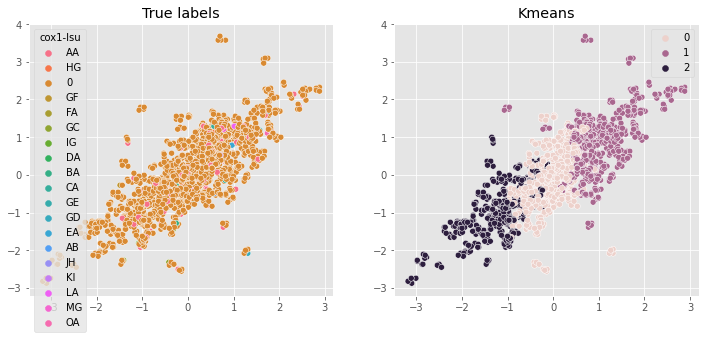

In [18]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

Text(0.5, 1.0, 'Kmeans')

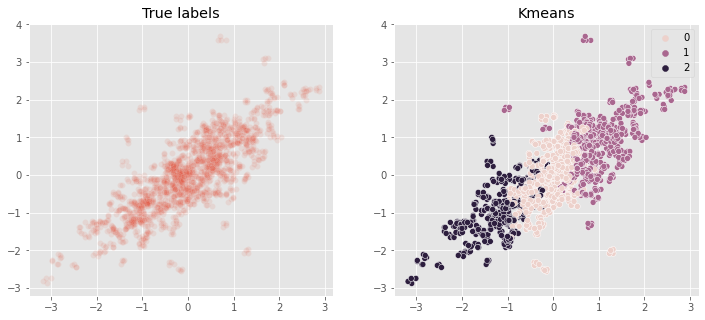

In [19]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],ax=ax[0], alpha=0.1)
#sns.scatterplot(x = x_scaled[indices,0], y = x_scaled[indices,1],hue=y_true[y_true!="0"],ax=ax[0], palette="magma")
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [20]:
indices = y_true[y_true!="0"].index

Text(0.5, 1.0, 'True labels')

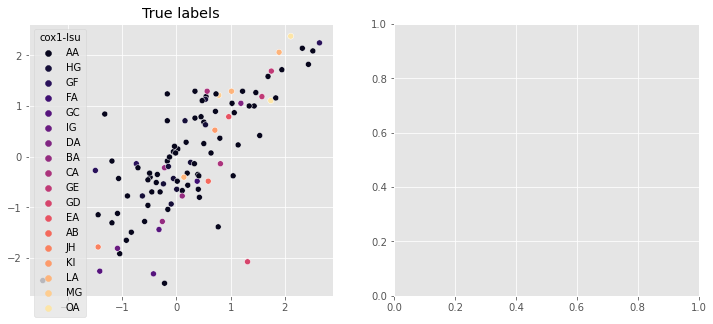

In [23]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[indices,0], y = x_scaled[indices,1],hue=y_true[y_true!="0"],ax=ax[0], palette="magma")
ax[0].set_title('True labels')

In [47]:
x_scaled.shape
x_scaled[indices].shape

(105, 8)

In [24]:
x_scaled[indices,0]

array([-0.16581772, -0.62447019, -0.23716366, -0.05370267,  0.16033514,
       -0.48177831,  0.54764167,  0.20110425,  0.02783554, -0.16581772,
       -0.05370267, -0.15562544, -0.29831732,  0.10937376, -0.73658523,
        1.04706325,  2.63705846, -1.31754502,  0.34379613, -0.34927871,
        0.40494979,  2.51475114,  1.94398362,  0.42533435,  0.39475752,
        0.38456524, -1.04235354, -2.45908005,  0.41514207,  0.72091038,
        1.02667869,  0.77187177,  0.34379613,  0.01764327, -0.42062465,
       -0.31870188, -1.40927552, -1.49081373, -1.08312265,  1.18975512,
        1.13879374,  0.10937376, -0.25754821, -0.21677911, -0.21677911,
        0.8024486 ,  0.56802623,  0.81264087, -0.82831573, -0.58370108,
        1.57706165,  1.75033036,  1.31206245,  0.96552503,  0.58841078,
        1.0674478 , -0.09447178,  0.00745099,  0.26225791,  0.50687256,
       -0.49197059,  0.45591118, -0.36966326, -1.43985235, -0.14543317,
        0.53744939,  0.7107181 ,  1.89302224,  0.78206404,  0.53

In [25]:
x_scaled[indices,1]

array([ 1.23836506, -0.77966472, -0.54068751, -0.43447542,  0.70730459,
       -0.4079224 ,  1.18525901, -0.32826333,  0.1496911 , -0.08928611,
        0.09658505, -1.04519496, -0.70000565, -0.67345263, -0.14239216,
       -0.38136937,  2.24737995,  0.84006971,  0.76041064, -0.35481635,
       -0.64689961,  2.08806181,  1.71631948, -0.80621775, -0.35481635,
       -0.48758147, -1.92144473, -2.4525052 , -0.38136937,  0.89317575,
        1.05249389, -1.39038426,  1.29147111, -0.48758147, -2.31974008,
       -1.44349031, -2.26663404, -0.27515728, -1.81523264,  1.05249389,
        0.22935017, -0.77966472, -1.28417217, -2.50561125, -0.22205123,
        0.36211528,  1.29147111, -0.14239216, -1.49659636, -1.28417217,
        1.18525901,  1.68976646, -2.08076287,  0.78696366, -0.48758147,
        0.86662273, -0.93898286, -0.64689961, -0.11583914,  0.68075157,
       -0.32826333,  0.78696366, -0.51413449, -1.78867962, -0.19549821,
        1.13215296,  0.52143343,  2.06150879,  1.21181203,  0.62

In [26]:
y_true[y_true!="0"]

0       AA
1       HG
16      HG
17      HG
18      HG
        ..
1650    AA
1660    AA
1661    AA
1662    AA
1664    AA
Name: cox1-lsu, Length: 105, dtype: object

In [ ]:
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f");

#print(classification_report(y_true,labels))

### Con todas las variables

In [42]:
x_R = data[['AE','LE','AT','LT','AA','LA','NV','Labio','Filtro_NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
#x_R = data[['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]
y_true = data["cox1-lsu"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

In [43]:
x_R_scaled.shape

(1688, 18)

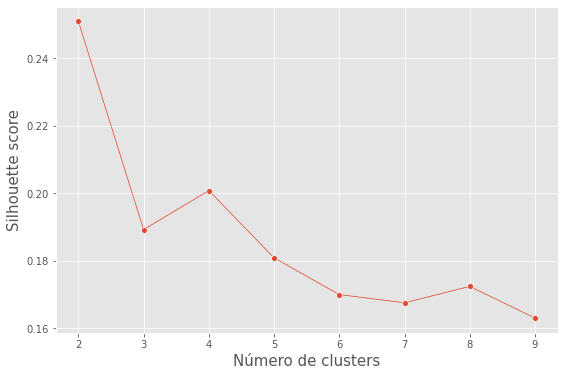

In [28]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_R_scaled)
    score=silhouette_score(x_R_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

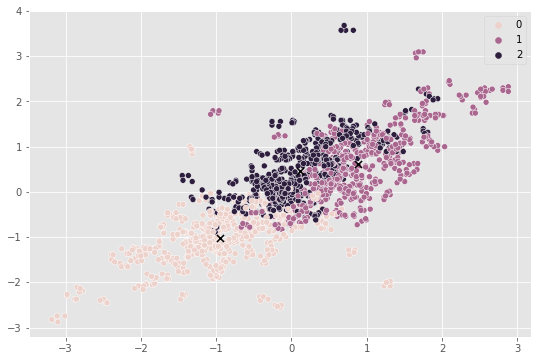

In [44]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

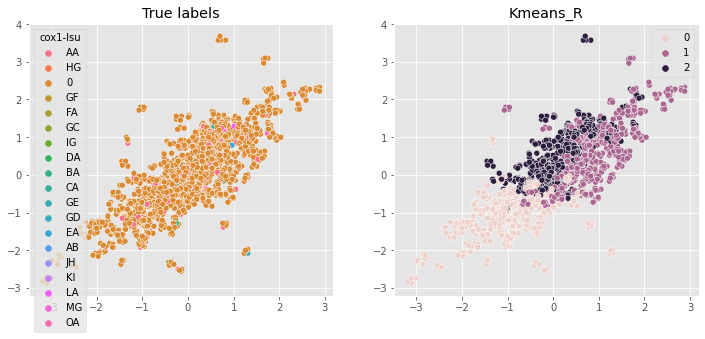

In [45]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

Text(0.5, 1.0, 'True labels')

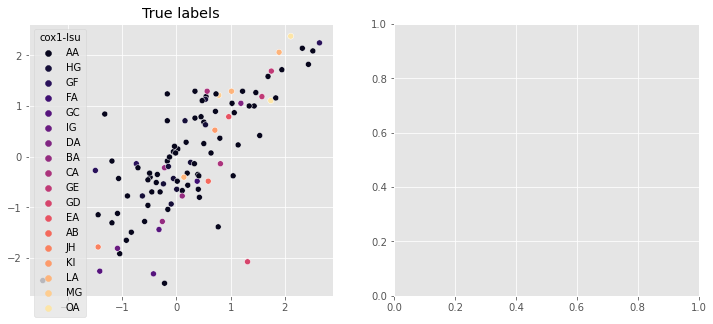

In [46]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[indices,0], y = x_R_scaled[indices,1],hue=y_true[y_true!="0"],ax=ax[0], palette="magma")
ax[0].set_title('True labels')

## DBSCAN

In [33]:
from scipy.spatial.distance import pdist,squareform

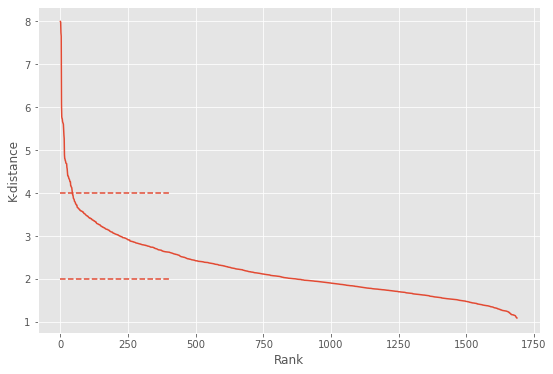

In [49]:
minPts=20;
k=minPts-1;

D=squareform(pdist(x_R_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([2,4],0,400,linestyles='dashed');

No handles with labels found to put in legend.


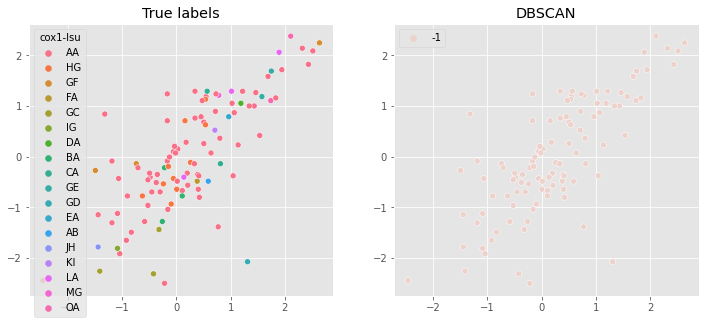

In [124]:
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x_R_scaled[indices])

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[indices,0], y = x_R_scaled[indices,1],hue=y_true[indices],ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[indices,0], y = x_R_scaled[indices,1],hue=labels_db,ax=ax[1])
ax[1].set_title('DBSCAN');


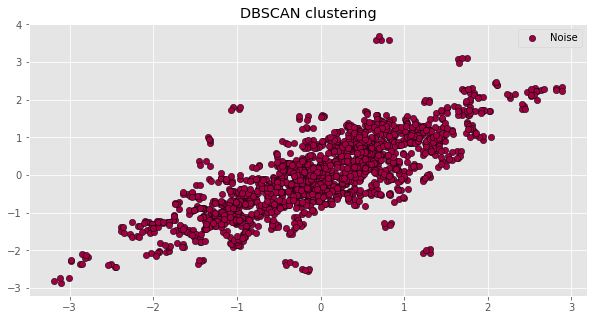

In [58]:
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x_R_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x_R_scaled[labels==l,0], x_R_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x_R_scaled[labels==l,0], x_R_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');
    

# Modelos reducción dimensionalidad

## Prueba PCA

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [64]:
std_sclr = StandardScaler()

X = data[['AE','LE','AT','LT','AA','LA','NV','Labio','Filtro_NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
          'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]

data_std = pd.DataFrame(std_sclr.fit_transform(X))

In [65]:
model = PCA()

In [66]:
model_pca = model.fit(data_std)

### Pesos (loadings)

In [67]:
#Creamos un DataFrame con los loadings.
pca_loadings = pd.DataFrame(model_pca.components_.T, index=X.columns).iloc[:,:]
pca_loadings.rename(columns = {0 : 'CP1', 1 : 'CP2', 2 : 'CP3', 3 : 'CP4',4 : 'CP5', 5 : 'CP6', 6 : 'CP7',\
                               7 : 'CP8',8 : 'CP9', 9 : 'CP10', 10 : 'CP11', 11 : 'CP12', 12 : 'CP13', 13 : 'CP14', 14 : 'CP15', 15 : 'CP16', 16 : 'CP17', 17 : 'CP18'}, inplace = True)
pca_loadings

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,CP13,CP14,CP15,CP16,CP17,CP18
AE,-0.338613,-0.128023,-0.165935,-0.030837,-0.049221,0.197252,-0.050480,-0.134679,-0.103345,0.194144,-0.183763,-0.074906,-0.196353,-0.295009,0.631972,-0.180813,0.037801,0.362769
LE,-0.347913,0.101935,-0.014190,0.163443,0.191813,0.023354,0.004040,-0.054693,-0.070116,0.550985,-0.468451,-0.074030,0.214152,0.242645,-0.324607,-0.088710,0.219103,-0.043536
AT,-0.302811,-0.261495,-0.073250,-0.007858,0.115702,0.181526,0.078567,0.053291,-0.091444,-0.105681,0.098896,0.154686,-0.040371,-0.062388,0.198281,0.099498,0.326672,-0.751303
LT,-0.329633,-0.180092,-0.079620,0.159256,-0.036805,0.144817,0.026712,0.194307,-0.099661,0.036379,-0.042857,0.013370,0.145168,-0.111334,-0.104979,0.255588,-0.797297,-0.087424
AA,-0.300224,-0.274737,0.084984,0.064113,0.002798,0.118886,0.027749,-0.079898,-0.098584,-0.223801,0.097397,0.520734,-0.137062,-0.165898,-0.454922,0.024324,0.221287,0.398095
LA,-0.214943,-0.325639,-0.208799,0.292756,0.066903,-0.039361,-0.005438,-0.056167,-0.085981,-0.253610,0.350097,-0.519086,0.061078,0.430486,-0.034428,-0.146024,0.079809,0.166104
NV,-0.321534,-0.040870,-0.077628,-0.052590,-0.106132,-0.174222,0.107119,-0.012405,0.912394,-0.012243,0.002430,0.008934,-0.012500,-0.004766,-0.000152,0.004870,-0.001144,-0.002175
Labio,-0.178032,-0.173856,0.084413,-0.340153,0.157320,-0.395947,-0.749418,0.263167,-0.048704,-0.007493,-0.016220,-0.007071,-0.002992,0.007679,-0.000906,0.004744,0.002768,0.000960
Filtro_NV,-0.206120,-0.032923,-0.096981,-0.303565,-0.238291,-0.657090,0.515180,0.041412,-0.312565,0.033653,-0.011335,0.008088,-0.000824,-0.006018,0.008306,-0.007595,-0.001136,0.003237
Ratio_LE_AE,-0.162806,0.316822,0.170196,0.306670,0.376580,-0.210336,0.073890,0.099272,-0.015614,-0.468245,-0.165955,0.098770,0.422115,-0.178948,0.228804,-0.158880,0.016205,0.062312


<AxesSubplot:xlabel='CP1', ylabel='CP2'>

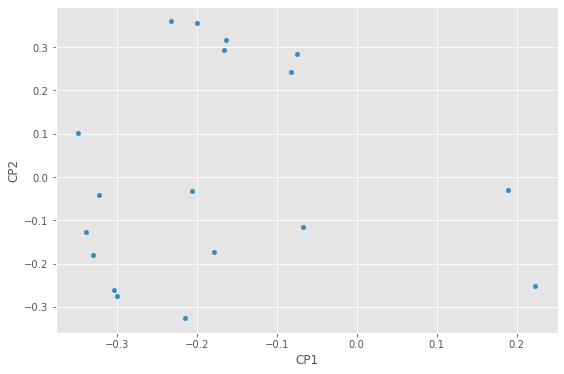

In [68]:
pca_loadings.plot(x="CP1", y="CP2", kind ="scatter")

In [ ]:
pca_loadings.T.dot(pca_loadings)

In [ ]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

In [ ]:
plot_explained_variance(components_count = 11, X = data_std)

### Proyección

In [69]:
#nuevo dataset con cada participación de feature
nuevo_data_pca = pd.DataFrame(model_pca.fit_transform(data_std), index =X.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [70]:
nuevo_data_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1.621213,0.201728,0.766453,1.508599,2.364290,-1.517060,0.137989,0.689477,0.068074,-0.027587,-0.074603,-0.062349,0.061089,0.004959,0.003068,-0.017963,0.013277,0.005419
1,2.187226,0.328328,-1.812780,-1.047860,0.376781,-1.172299,-0.857718,-0.295291,-0.153994,-0.032119,-0.076176,0.040822,0.015992,-0.003262,-0.031804,0.011624,-0.010858,-0.011143
2,-0.506024,-0.735269,1.763324,-0.648200,0.316395,-0.215181,-0.002788,0.448721,-0.223345,-0.026412,-0.027970,-0.004628,-0.020138,0.015018,-0.006153,-0.006403,-0.003158,0.001828
3,-2.522558,6.159036,-1.003402,-0.772272,-0.810484,0.711179,0.147044,-0.698350,0.358711,0.060623,0.382388,0.053771,0.098628,0.058512,-0.022658,0.055910,0.012053,0.004368
4,-1.753290,0.090423,1.257711,1.866203,2.019877,-1.704560,0.000542,0.359523,0.051198,-0.051165,-0.076927,-0.043045,0.070747,0.022972,0.001800,-0.007843,0.014641,0.021071
5,-1.465987,-0.036449,0.776537,1.585317,2.630183,-1.736178,0.184325,0.401174,0.206989,-0.049903,-0.077133,-0.060717,0.057269,0.004963,0.006958,-0.012840,0.018205,0.007220
6,-1.768182,0.251083,0.863884,1.587636,1.948462,-1.607138,-0.064113,0.248577,0.166875,-0.032180,-0.076186,-0.052603,0.043725,0.017211,-0.003847,-0.005721,0.014272,0.012878
7,2.023101,0.396701,-1.979971,-1.178119,-0.174569,-0.939149,-1.011794,-0.243520,-0.194500,-0.060703,-0.088315,0.039376,0.037081,0.011163,-0.037216,0.003886,-0.001396,-0.013176
8,1.964148,0.142129,-1.531373,-1.037676,-0.465149,-1.004291,-1.006545,-0.294953,-0.043989,-0.054626,-0.082118,0.016209,0.037858,-0.005120,-0.041001,-0.000934,0.000706,-0.018437
9,2.060798,0.320949,-1.371767,-0.922017,0.092079,-1.208684,-0.900532,-0.364418,-0.116491,-0.039784,-0.074568,0.018450,0.018417,-0.013520,-0.035692,0.010198,-0.008050,-0.016269


In [71]:
nuevo_data_pca.reset_index()

,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0,-1.621213,0.201728,0.766453,1.508599,2.364290,-1.517060,0.137989,0.689477,0.068074,-0.027587,-0.074603,-0.062349,0.061089,0.004959,0.003068,-0.017963,0.013277,0.005419
1,1,2.187226,0.328328,-1.812780,-1.047860,0.376781,-1.172299,-0.857718,-0.295291,-0.153994,-0.032119,-0.076176,0.040822,0.015992,-0.003262,-0.031804,0.011624,-0.010858,-0.011143
2,2,-0.506024,-0.735269,1.763324,-0.648200,0.316395,-0.215181,-0.002788,0.448721,-0.223345,-0.026412,-0.027970,-0.004628,-0.020138,0.015018,-0.006153,-0.006403,-0.003158,0.001828
3,3,-2.522558,6.159036,-1.003402,-0.772272,-0.810484,0.711179,0.147044,-0.698350,0.358711,0.060623,0.382388,0.053771,0.098628,0.058512,-0.022658,0.055910,0.012053,0.004368
4,4,-1.753290,0.090423,1.257711,1.866203,2.019877,-1.704560,0.000542,0.359523,0.051198,-0.051165,-0.076927,-0.043045,0.070747,0.022972,0.001800,-0.007843,0.014641,0.021071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,-1.750038,1.996240,2.521976,-1.132196,0.025452,0.010110,-0.172208,0.639223,0.044695,0.069910,0.153575,0.019922,0.014276,0.007576,0.017594,-0.059355,-0.025505,0.008449
1684,1684,-1.715908,2.184979,1.657141,-1.406230,-0.320904,0.229418,-0.360393,0.707819,0.037414,0.066022,0.136359,-0.007684,0.027886,-0.003380,0.010180,-0.029201,-0.012307,0.009313
1685,1685,0.962673,-2.542154,1.636797,-0.546985,0.295481,-0.827589,0.367495,0.773841,0.895101,-0.008250,0.010959,-0.017265,-0.038833,0.028398,-0.017408,0.027026,0.000400,0.005585
1686,1686,0.743749,-2.472172,2.011787,-0.367456,0.133430,-0.823731,0.322399,0.735434,0.776194,-0.023639,0.007928,0.003767,-0.038204,0.046534,-0.013313,0.028554,-0.004874,0.010726


In [72]:
data.reset_index()

,index,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,...,Filtro_NV,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,0,96,1,6.08,2.23,14.03,10.49,8.09,6.96,5.28,...,True,0.366776,0.747684,0.860321,0.212583,0.433357,0.663489,0.576622,0.320402,0.751545
1,1,96,2,5.63,1.47,11.63,8.30,6.38,5.86,4.97,...,True,0.261101,0.713672,0.918495,0.177108,0.484093,0.706024,0.548581,0.250853,0.882445
2,2,96,5,6.14,1.77,13.77,9.95,8.22,6.10,5.11,...,True,0.288274,0.722585,0.742092,0.177889,0.445897,0.613065,0.596950,0.290164,0.746959
3,3,96,6,6.60,2.20,11.80,9.27,6.56,4.95,5.44,...,True,0.333333,0.785593,0.754573,0.237325,0.559322,0.533981,0.555932,0.444444,1.006098
4,4,96,7,6.07,2.24,13.88,10.49,8.28,7.03,5.29,...,True,0.369028,0.755764,0.849034,0.213537,0.437320,0.670162,0.596542,0.318634,0.733092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1683,554,25,6.12,1.96,12.97,9.71,7.76,5.23,5.25,...,True,0.320261,0.748651,0.673969,0.201854,0.471858,0.538620,0.598304,0.374761,0.788660
1684,1684,554,26,6.29,1.93,12.96,9.76,7.58,5.23,5.26,...,True,0.306836,0.753086,0.689974,0.197746,0.485340,0.535861,0.584877,0.369025,0.829815
1685,1685,554,27,5.59,1.47,13.51,9.58,8.04,6.33,5.34,...,True,0.262970,0.709104,0.787313,0.153445,0.413768,0.660752,0.595115,0.232227,0.695274
1686,1686,554,28,5.61,1.50,13.52,9.68,8.18,6.33,5.32,...,True,0.267380,0.715976,0.773839,0.154959,0.414941,0.653926,0.605030,0.236967,0.685819


In [77]:
nuevo2= pd.concat([nuevo_data_pca, data["cox1-lsu"]], axis=1)

In [85]:
nuevo2.head(5)
#nuevo2.replace("NaN",0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,cox1-lsu
0,-1.621213,0.201728,0.766453,1.508599,2.364290,-1.517060,0.137989,0.689477,0.068074,-0.027587,-0.074603,-0.062349,0.061089,0.004959,0.003068,-0.017963,0.013277,0.005419,AA
1,2.187226,0.328328,-1.812780,-1.047860,0.376781,-1.172299,-0.857718,-0.295291,-0.153994,-0.032119,-0.076176,0.040822,0.015992,-0.003262,-0.031804,0.011624,-0.010858,-0.011143,HG
2,-0.506024,-0.735269,1.763324,-0.648200,0.316395,-0.215181,-0.002788,0.448721,-0.223345,-0.026412,-0.027970,-0.004628,-0.020138,0.015018,-0.006153,-0.006403,-0.003158,0.001828,0
3,-2.522558,6.159036,-1.003402,-0.772272,-0.810484,0.711179,0.147044,-0.698350,0.358711,0.060623,0.382388,0.053771,0.098628,0.058512,-0.022658,0.055910,0.012053,0.004368,0
4,-1.753290,0.090423,1.257711,1.866203,2.019877,-1.704560,0.000542,0.359523,0.051198,-0.051165,-0.076927,-0.043045,0.070747,0.022972,0.001800,-0.007843,0.014641,0.021071,0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

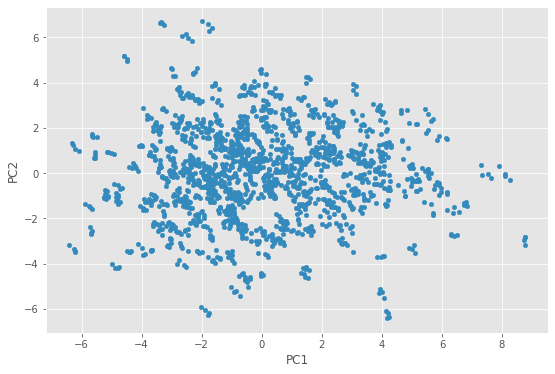

In [79]:
nuevo2.plot(x="PC1", y="PC2", kind ="scatter")

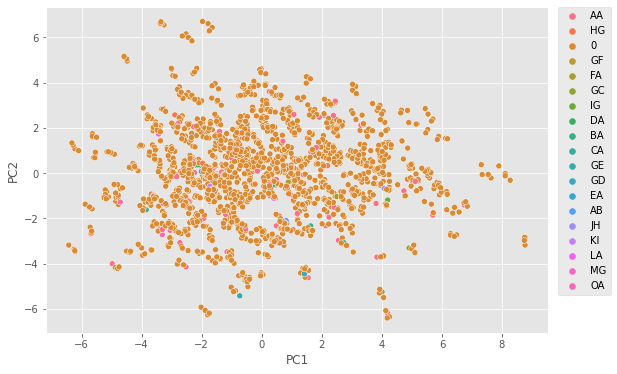

In [120]:
sns.scatterplot(data=nuevo2,x="PC1", y="PC2",hue="cox1-lsu" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [88]:
indices2 = nuevo2[nuevo2["cox1-lsu"]!="0"].index

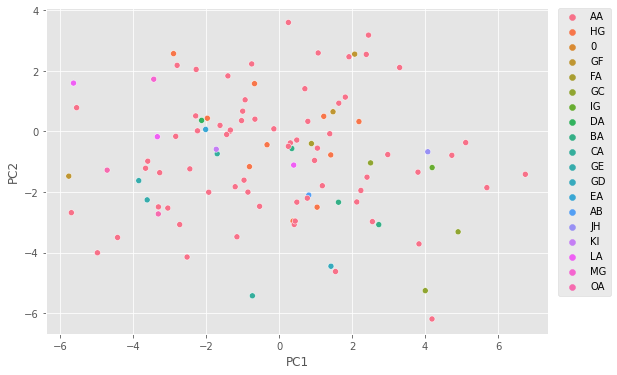

In [119]:
sns.scatterplot(data=nuevo2,x=nuevo2.PC1[indices], y=nuevo2.PC2[indices2],hue="cox1-lsu" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [94]:
model_pca.explained_variance_ratio_

array([3.99628530e-01, 2.29436762e-01, 1.25984963e-01, 7.68289672e-02,
       6.13364997e-02, 4.02135565e-02, 2.98857702e-02, 2.20837764e-02,
       1.27661095e-02, 6.34412903e-04, 4.08706771e-04, 2.35716092e-04,
       1.82832658e-04, 1.41581227e-04, 1.04243823e-04, 6.31368415e-05,
       3.62630037e-05, 2.81718109e-05])

### Bastón quebrado

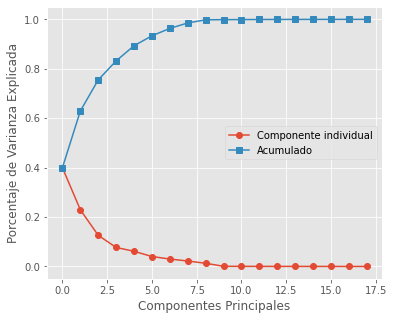

In [95]:
plt.figure(figsize=(6,5))

plt.plot(model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

## Prueba TSNE

In [96]:
from sklearn.manifold import TSNE

In [97]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(data_std)

In [98]:
data_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.165818,1.238365,0.391905,0.495167,0.321955,0.760541,0.454609,0.854113,0.30655,2.256107,0.269761,0.516143,1.322856,-1.280251,0.380014,-0.092006,0.679067,-0.912693
1,-0.624470,-0.779665,-0.843994,-1.029964,-1.064153,-0.442926,-0.584837,0.854113,0.30655,-0.554716,-0.660628,1.262376,-0.106359,0.474539,1.176758,-1.049702,-0.587305,0.988954
2,-0.104664,0.016926,0.258016,0.119107,0.427331,-0.180352,-0.115410,0.854113,0.30655,0.168034,-0.416794,-1.000452,-0.074893,-0.846540,-0.564496,0.602295,0.128477,-0.979323
3,0.364181,1.158706,-0.756451,-0.354450,-0.918247,-1.438522,0.991097,-1.170806,0.30655,1.366566,1.306771,-0.840354,2.319632,3.076478,-2.045869,-0.798635,2.937666,2.785311
4,-0.176010,1.264918,0.314661,0.495167,0.475967,0.837125,0.488139,0.854113,0.30655,2.315999,0.490792,0.371351,1.361262,-1.143191,0.505009,0.588356,0.646876,-1.180774


In [104]:
nuevo3= pd.DataFrame(proj_tsne)

In [105]:
nuevo3.head()

,0,1
0,-43.005302,-7.576526
1,7.207094,-18.759443
2,-18.973658,1.788710
3,22.773510,39.283428
4,-42.936794,-7.261650


In [108]:
nuevo4= pd.concat([nuevo3, data["cox1-lsu"]], axis=1)

In [109]:
nuevo4.columns = ["X","Y","cox1-lsu"]

In [110]:
nuevo4.head()

,X,Y,cox1-lsu
0,-43.005302,-7.576526,AA
1,7.207094,-18.759443,HG
2,-18.973658,1.788710,0
3,22.773510,39.283428,0
4,-42.936794,-7.261650,0


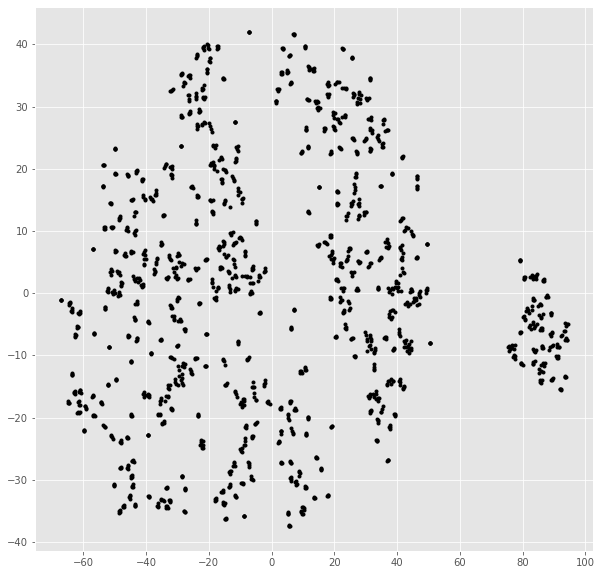

In [111]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne[:, 0]
coord_y = proj_tsne[:, 1]
ax.plot(coord_x, coord_y, '.k')    

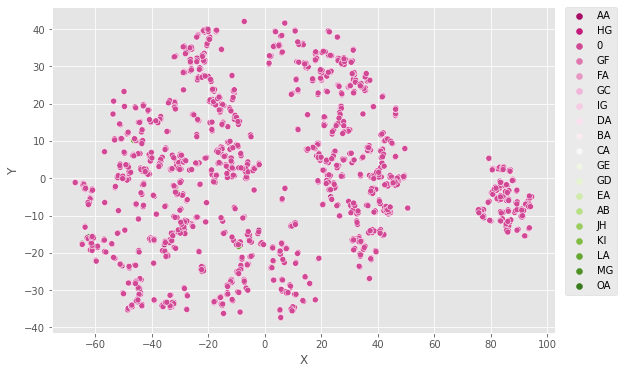

In [118]:
sns.scatterplot(data=nuevo4,x="X", y="Y",hue="cox1-lsu",palette="PiYG" )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [115]:
nuevo5= nuevo4[nuevo4['cox1-lsu']!="0"]

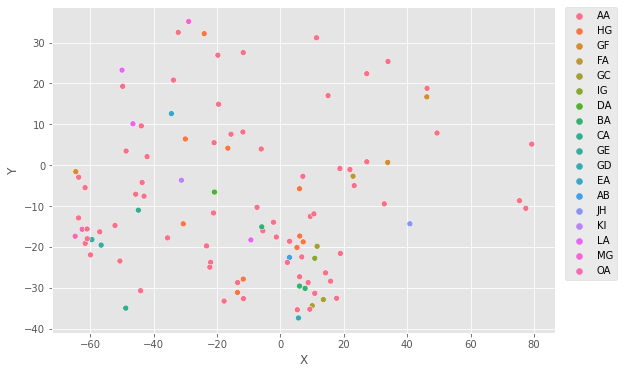

In [117]:
sns.scatterplot(data=nuevo5,x="X", y="Y",hue="cox1-lsu")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Modelos clasificación

## CART con oversampling target MORFOTIPO

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
newX = data[['AE','LE','AT','LT','AA','LA','NV','Labio','Filtro_NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
newy = data['Morfotipo']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(newX,newy,stratify = data['Morfotipo'],random_state=0)

In [145]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

Entrenamiento: (1266, 18)
Testeo: (422, 18)

Clases train:
LU    0.860190
LB    0.132701
DU    0.007109
Name: Morfotipo, dtype: float64

Clases test:
LU    0.860190
LB    0.132701
DU    0.007109
Name: Morfotipo, dtype: float64


### OverSampling

In [146]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
DU    1089
LU    1089
LB     168
Name: Morfotipo, dtype: int64

Composición del test set:
LU    363
LB     56
DU      3
Name: Morfotipo, dtype: int64


In [147]:
X_train_os2,y_train_os2=oversampler.fit_resample(X_train_os,y_train_os);

print('Composición del training set:')
print(y_train_os2.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
DU    1089
LU    1089
LB    1089
Name: Morfotipo, dtype: int64

Composición del test set:
LU    363
LB     56
DU      3
Name: Morfotipo, dtype: int64


## CART

In [126]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score

### CART con variables originales oversampleadas

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth = 7, random_state=42)
clf_dt = clf_dt.fit(X_train_os2,y_train_os2)

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["LU","DU", "LB"], 
          feature_names=X_train_os2.columns); 

In [ ]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["LU","DU","LB"])

In [ ]:
accuracy_score(y_test, clf_dt.predict(X_test))

### CART con variables de PCA

In [129]:
X_PCA = nuevo2[['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6']]
y_PCA = data['Morfotipo']

In [130]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA,stratify = data['Morfotipo'],random_state=0)

In [136]:
clf_dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
clf_dt = clf_dt.fit(X_train_PCA,y_train_PCA)

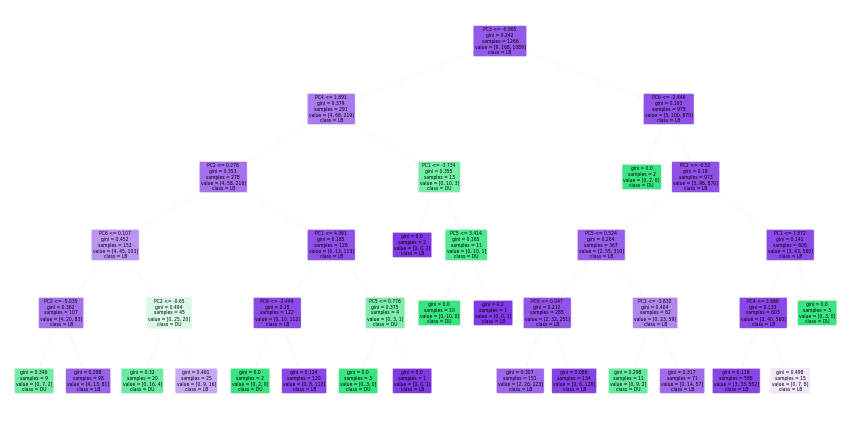

In [137]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["LU","DU", "LB"], 
          feature_names=X_train_PCA.columns); 

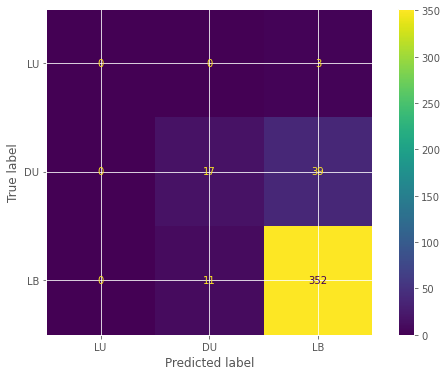

In [138]:
plot_confusion_matrix(clf_dt, X_test_PCA, y_test_PCA, display_labels=["LU","DU","LB"])

In [139]:
accuracy_score(y_test_PCA, clf_dt.predict(X_test_PCA))

0.8744075829383886

## XGBoost con variables oversampleadas

In [140]:
from xgboost import XGBClassifier


In [148]:
y_train_os2.astype("category")

0       LU
1       LU
2       LU
3       LU
4       LU
        ..
3262    LB
3263    LB
3264    LB
3265    LB
3266    LB
Name: Morfotipo, Length: 3267, dtype: category
Categories (3, object): ['DU', 'LB', 'LU']

In [149]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train_os2)
y_train_os22 = le.transform(y_train_os2)

In [150]:
xgboost = XGBClassifier()

In [151]:
clf_XGB = xgboost.fit(X_train_os2,y_train_os22)

In [152]:
accuracy_score(le.transform(y_test), xgboost.predict(X_test))

0.9597156398104265